In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
electricity = pd.read_csv('Electric_Production.csv')

In [3]:
electricity.dtypes

DATE      object
Value    float64
dtype: object

In [4]:
electricity.DATE = pd.to_datetime(electricity.DATE)

In [5]:
electricity.DATE.isna().any()

False

In [6]:
electricity.DATE.count()

397

In [7]:
electricity

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


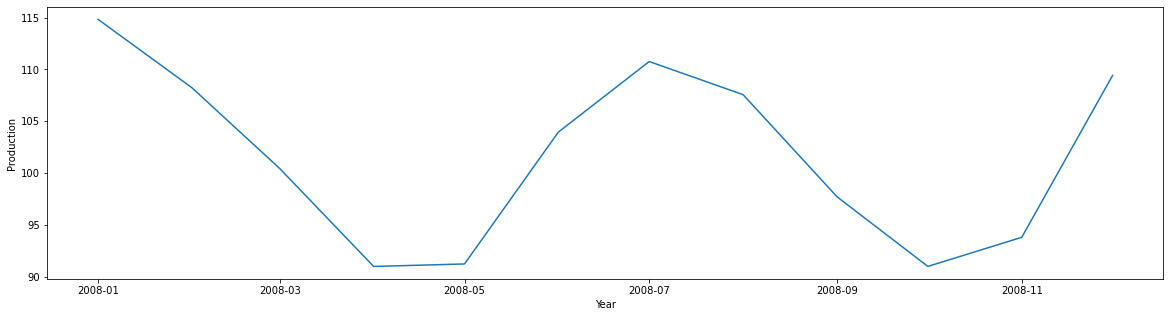

In [8]:
year_2008 = electricity[electricity.DATE.dt.year ==2008]

plt.figure(figsize=(20,5))
plt.plot(year_2008.DATE, year_2008.Value)

plt.xlabel("Year")
plt.ylabel("Production")

plt.show()

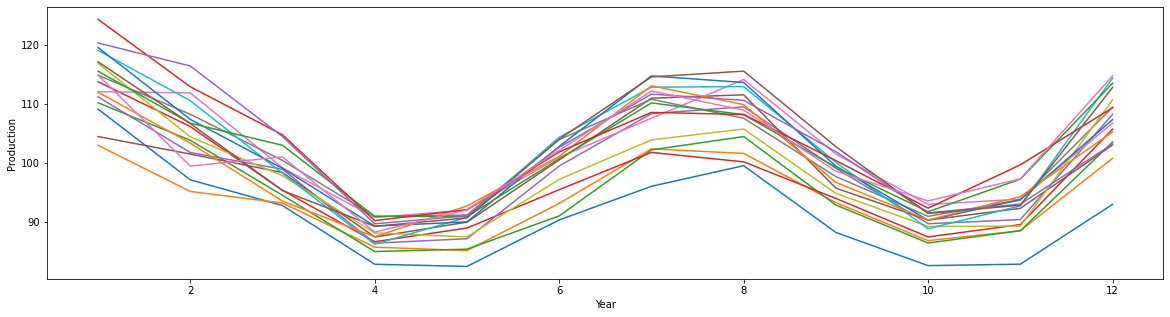

In [9]:
plt.figure(figsize=(20,5))

for year in range(2001,2018):
    current_year = electricity[electricity.DATE.dt.year == year]
    plt.plot(current_year.DATE.dt.month, current_year.Value)

plt.xlabel("Year")
plt.ylabel("Production")

plt.show()

In [10]:
electricity['year']=electricity.DATE.dt.year
electricity['month']=electricity.DATE.dt.month

In [11]:
electricity =electricity.drop(columns="DATE")

In [12]:
electricity

,Value,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [13]:
target = electricity.Value
attributes = electricity.drop(columns = ['Value'])

In [14]:
attributes_train,attributes_test, targets_train,targets_test = train_test_split(attributes,target,test_size = 0.2)

In [15]:
linear_algo = Ridge(alpha=10)
linear_algo.fit(attributes_train,targets_train)

Ridge(alpha=10)

In [16]:
linear_algo.score(attributes_train,targets_train)

0.7160345776133696

In [17]:
linear_algo.score(attributes_test,targets_test)

0.6745161592666649

In [18]:
test_pred = linear_algo.predict(attributes_test)

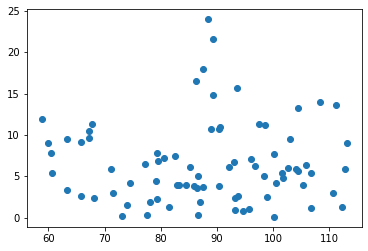

In [19]:
plt.scatter(targets_test, np.abs(test_pred-targets_test))

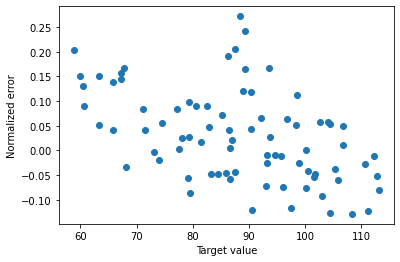

In [20]:
plt.scatter(targets_test, (test_pred-targets_test) /targets_test)

plt.xlabel("Target value")
plt.ylabel("Normalized error")
plt.show()

high bias because residuals are not random

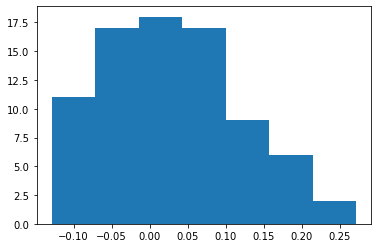

In [21]:
plt.hist(((test_pred-targets_test) / targets_test), bins="fd")
plt.show()

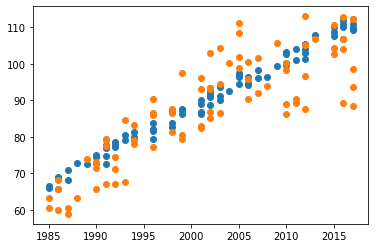

In [22]:

plt.scatter(attributes_test.year,test_pred,label = "test predictions")
plt.scatter(attributes_test.year,targets_test,label = "target")

In [23]:
electricity.shift(1)["Value"]
# shift buta zapisite nadolu ako e polojitelno chislo
# shift buta zapisite nagore ako e negativno chislo

0           NaN
1       72.5052
2       70.6720
3       62.4502
4       57.4714
         ...   
392    108.9312
393     98.6154
394     93.6137
395     97.3359
396    114.7212
Name: Value, Length: 397, dtype: float64

In [24]:
# this is linear correlation
electricity["Value"].corr(electricity.shift(1)["Value"])

0.8717308657532122

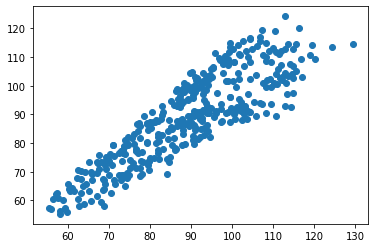

In [25]:
plt.scatter(electricity["Value"],electricity.shift(1)["Value"])

In [26]:
electricity["Value"].corr(electricity.shift(2)["Value"])

0.6465816539907929

In [27]:
electricity["Value"].corr(electricity.shift(3)["Value"])

0.5355867575850729

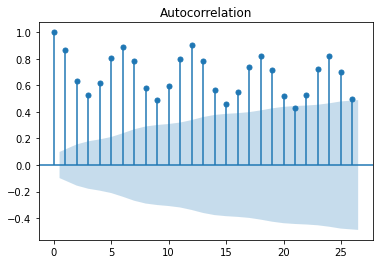

In [28]:
plot_acf(electricity.Value)
plt.show()

# strong periodicity on every 6 months so these are good predictions
# the blue zone is the confidence interval for error, 95 % CI
# if the value is in the blue zone we believe it is not significant

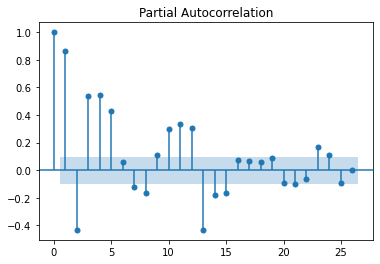

In [29]:
plot_pacf(electricity.Value)
plt.show()
# looking at the lags in the past
# difference between the previous and the current shifted value

In [31]:
for lag in [1,2,4,6,8,12]:
    electricity[f"lag_{lag}"] = electricity.Value.shift(lag)

In [32]:
electricity

,Value,year,month,lag_1,lag_2,lag_4,lag_6,lag_8,lag_12
0,72.5052,1985,1,NaN,NaN,NaN,NaN,NaN,NaN
1,70.6720,1985,2,72.5052,NaN,NaN,NaN,NaN,NaN
2,62.4502,1985,3,70.6720,72.5052,NaN,NaN,NaN,NaN
3,57.4714,1985,4,62.4502,70.6720,NaN,NaN,NaN,NaN
4,55.3151,1985,5,57.4714,62.4502,72.5052,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,92.0805,101.0396,114.8505,102.7637
393,93.6137,2017,10,98.6154,108.9312,102.1532,88.3530,99.4901,91.4867
394,97.3359,2017,11,93.6137,98.6154,112.1538,92.0805,101.0396,92.8900
395,114.7212,2017,12,97.3359,93.6137,108.9312,102.1532,88.3530,112.7694


In [33]:
# remove the nan values
electricity = electricity.dropna()

In [34]:
electricity

,Value,year,month,lag_1,lag_2,lag_4,lag_6,lag_8,lag_12
12,73.3057,1986,1,68.7145,58.0005,60.5846,62.6202,55.3151,72.5052
13,67.9869,1986,2,73.3057,68.7145,56.3154,63.2485,58.0904,70.6720
14,62.2221,1986,3,67.9869,73.3057,58.0005,60.5846,62.6202,62.4502
15,57.0329,1986,4,62.2221,67.9869,68.7145,56.3154,63.2485,57.4714
16,55.8137,1986,5,57.0329,62.2221,73.3057,58.0005,60.5846,55.3151
...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,92.0805,101.0396,114.8505,102.7637
393,93.6137,2017,10,98.6154,108.9312,102.1532,88.3530,99.4901,91.4867
394,97.3359,2017,11,93.6137,98.6154,112.1538,92.0805,101.0396,92.8900
395,114.7212,2017,12,97.3359,93.6137,108.9312,102.1532,88.3530,112.7694


In [37]:
target = electricity.Value
attributes = electricity.drop(columns = ['Value'])
attributes_train,attributes_test, targets_train,targets_test = train_test_split(attributes,target,test_size = 0.2,random_state=33)

In [38]:
linear_ar_model = Ridge(
    alpha = 1

)
linear_ar_model.fit(attributes_train,targets_train)

Ridge(alpha=1)

In [39]:
linear_ar_model.score(attributes_train,targets_train)

0.9617793746801732

In [40]:
linear_ar_model.score(attributes_test,targets_test)

0.9727509570537

In [41]:
test_pred = linear_ar_model.predict(attributes_test)

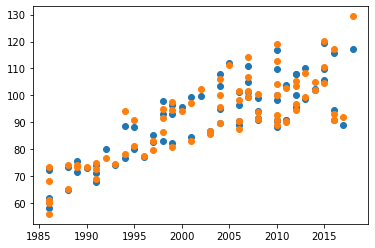

In [42]:

plt.scatter(attributes_test.year,test_pred,label = "test predictions")
plt.scatter(attributes_test.year,targets_test,label = "target")

In [43]:
electricity

,Value,year,month,lag_1,lag_2,lag_4,lag_6,lag_8,lag_12
12,73.3057,1986,1,68.7145,58.0005,60.5846,62.6202,55.3151,72.5052
13,67.9869,1986,2,73.3057,68.7145,56.3154,63.2485,58.0904,70.6720
14,62.2221,1986,3,67.9869,73.3057,58.0005,60.5846,62.6202,62.4502
15,57.0329,1986,4,62.2221,67.9869,68.7145,56.3154,63.2485,57.4714
16,55.8137,1986,5,57.0329,62.2221,73.3057,58.0005,60.5846,55.3151
...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,92.0805,101.0396,114.8505,102.7637
393,93.6137,2017,10,98.6154,108.9312,102.1532,88.3530,99.4901,91.4867
394,97.3359,2017,11,93.6137,98.6154,112.1538,92.0805,101.0396,92.8900
395,114.7212,2017,12,97.3359,93.6137,108.9312,102.1532,88.3530,112.7694


In [44]:
linear_ar_model.coef_

array([-0.00114073,  0.29793942,  0.47941426, -0.13265474,  0.10421373,
        0.11569721, -0.17559651,  0.57290882])